In [ ]:
import pandas as pd

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score


In [ ]:
#train_data_path=r"kaggle.com/datasets/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data=pd.read_csv('/train_data.txt',sep=":::",names=["Movie_name","Gener","Description"],engine="python")
train_data.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
test_data=pd.read_csv('/test_data_solution.txt',sep=":::",names=["Movie_name","Gener","Description"],engine="python")
test_data.head(10)

,Movie_name,Gener,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
10,Press (2011),drama,Press is a story of young people overwhelmed ...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9560 entries, 1 to 9560
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   9560 non-null   object
 1   Gener        9560 non-null   object
 2   Description  9560 non-null   object
dtypes: object(3)
memory usage: 298.8+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8055 entries, 1 to 8055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   8055 non-null   object
 1   Gener        8055 non-null   object
 2   Description  8055 non-null   object
dtypes: object(3)
memory usage: 251.7+ KB


In [ ]:
test_data.describe()

,Movie_name,Gener,Description
count,8055,8055,8055
unique,8055,27,8049
top,Edgar's Lunch (1998),drama,Award of the American academy of cinematograp...
freq,1,2073,2


In [ ]:
train_data.describe()

,Movie_name,Gener,Description
count,9560,9560,9560
unique,9560,27,9556
top,Oscar et la dame rose (2009),drama,Award of the American academy of cinematograp...
freq,1,2365,3


In [ ]:
train_data.isnull().sum()

,0
Movie_name,0
Gener,0
Description,0


In [ ]:
test_data.isnull().sum()

,0
Movie_name,0
Gener,0
Description,0


In [ ]:
train_data.count()

,0
Movie_name,9560
Gener,9560
Description,9560


In [ ]:
test_data.count()

,0
Movie_name,8055
Gener,8055
Description,8055


In [ ]:
  train_data.iloc[0:5]

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.loc[5]

,5
Movie_name,The Unrecovered (2007)
Gener,drama
Description,The film's title refers not only to the un-re...


In [ ]:
test_data.shape

(8055, 3)

In [ ]:
train_data.shape

(9560, 3)

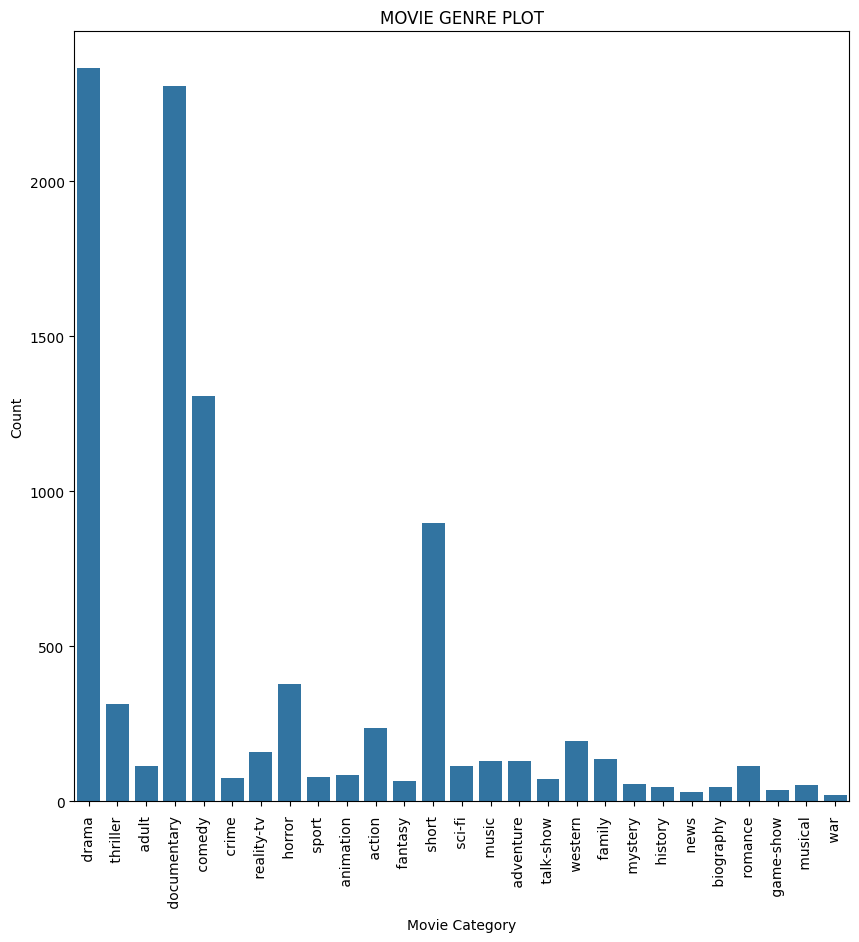

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gener', data=train_data)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('MOVIE GENRE PLOT')
plt.xticks(rotation=90)
plt.show()


# New Section

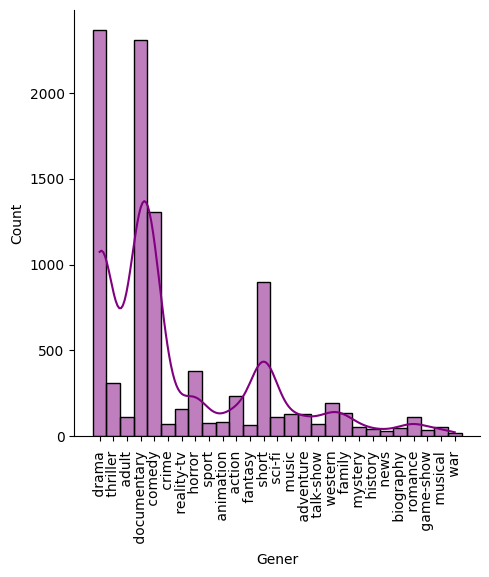

In [ ]:
sns.displot(train_data.Gener,kde =True,color='purple')
plt.xticks(rotation=90);

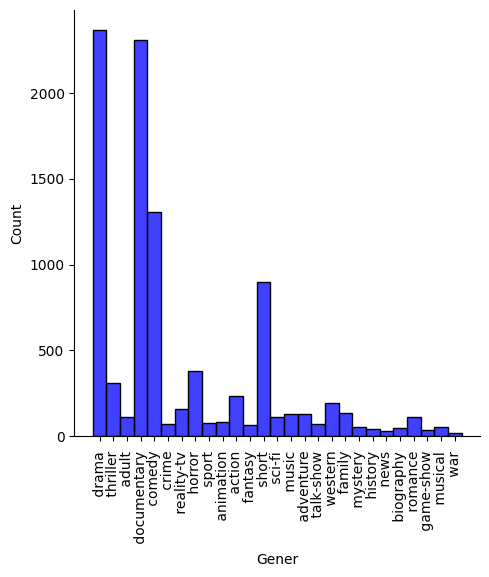

In [ ]:
sns.displot(train_data.Gener, kde=False,color="blue")
plt.xticks(rotation=90);


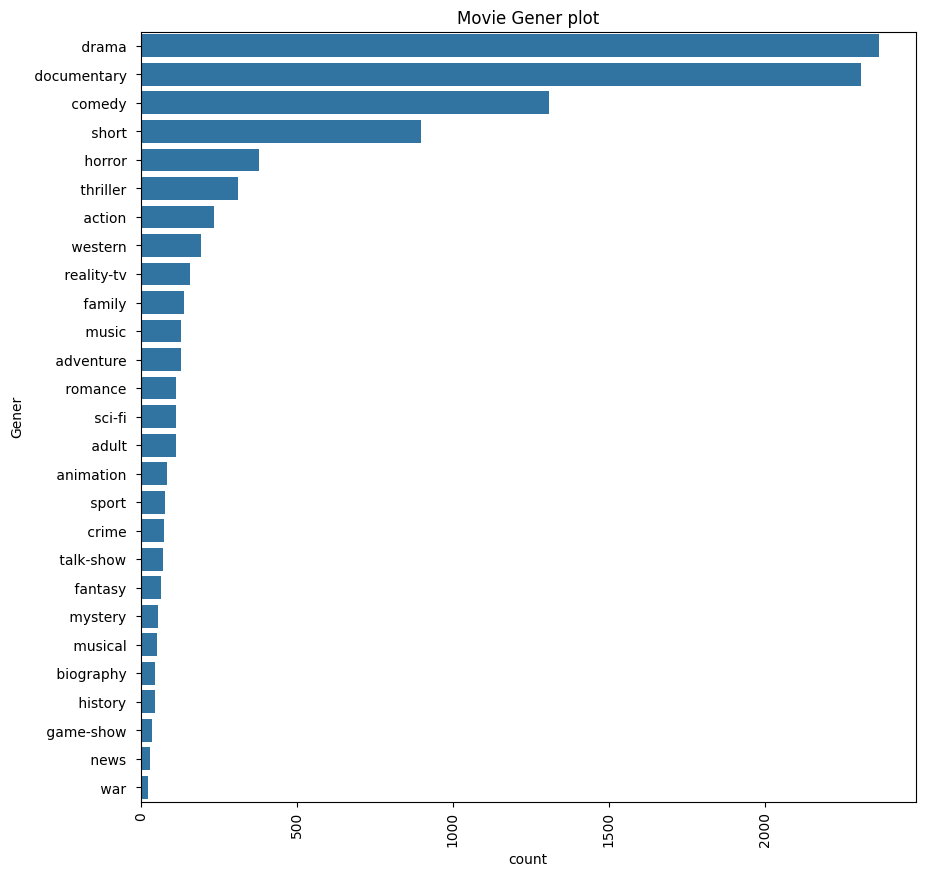

In [ ]:
plt.figure(figsize=(10,10))
count1=train_data.Gener.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count')
plt.ylabel('Gener')
plt.title('Movie Gener plot')
plt.xticks(rotation=90)
plt.show()

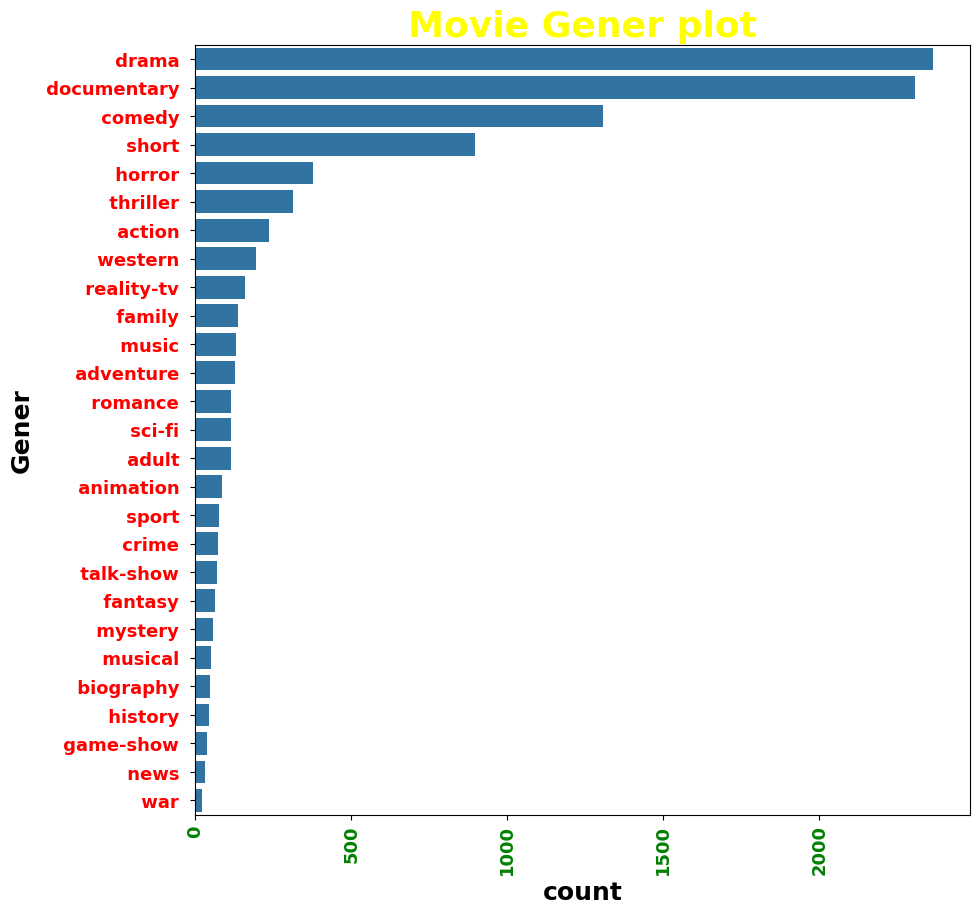

In [ ]:
plt.figure(figsize=(10,10))
count1=train_data.Gener.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count',fontsize=18,fontweight='bold')
plt.ylabel('Gener',fontsize=18,fontweight='bold')
plt.title('Movie Gener plot',fontsize=26,fontweight='bold',color='yellow')
plt.xticks(rotation=90,fontsize=13,fontweight='bold',color='green')
plt.yticks(fontsize=13,fontweight='bold',color='red')
plt.show()

In [ ]:
train_combined=pd.concat([train_data,test_data],axis=0)

In [ ]:
train_combined.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_combined.shape

(17615, 3)

In [ ]:
train_combined.size

52845

In [ ]:
train_combined.isnull().any()

,0
Movie_name,False
Gener,False
Description,False


In [ ]:
train_combined.count()

,0
Movie_name,17615
Gener,17615
Description,17615


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Import the LabelEncoder class

In [ ]:
encoded = LabelEncoder()
train_combined['Gener'] = encoded.fit_transform(train_combined["Gener"].values)


In [ ]:
encoded = LabelEncoder()
train_combined['Movie_name'] = encoded.fit_transform(train_combined["Movie_name"].values)


In [ ]:
train_combined.head()

,Movie_name,Gener,Description
1,11231,8,Listening in to a conversation between his do...
2,5017,24,A brother and sister with a past incestuous r...
3,17459,1,As the bus empties the students for their fie...
4,15604,8,To help their unemployed father make ends mee...
5,15832,8,The film's title refers not only to the un-re...


In [ ]:
train_combined.Gener=train_combined.Gener.fillna(train_combined.Gener.mean())

In [ ]:
train_combined.count()

,0
Movie_name,17615
Gener,17615
Description,17615


In [ ]:
train_combined.duplicated().values.any()

False

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
x=vectorizer.fit_transform(train_combined['Description'])

In [ ]:
train_combined.head()

,Movie_name,Gener,Description
1,11231,8,Listening in to a conversation between his do...
2,5017,24,A brother and sister with a past incestuous r...
3,17459,1,As the bus empties the students for their fie...
4,15604,8,To help their unemployed father make ends mee...
5,15832,8,The film's title refers not only to the un-re...


In [ ]:
y=train_combined['Gener']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn.naive_bayes import MultinomialNB # Import the MultinomialNB class

In [ ]:
naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
nb_predictions=naive_bayes_model.predict(x_test)

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix # Import confusion_matrix

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, classification_report # Import both functions
from sklearn.metrics import accuracy_score, r2_score


In [ ]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test,nb_predictions))
print(classification_report(y_test,nb_predictions))
print("Accuracy:",accuracy_score(y_test,nb_predictions))
print("r2_Score:",r2_score(y_test,nb_predictions))

Naive Bayes Model:
[[   0    0    0    0    0    0    0   21   83    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    6   35    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   16   48    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   18   34    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   13    8    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    4    0  104  528    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    3   40    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class



In [ ]:
logistic_regression_model=LogisticRegression()

In [ ]:
logistic_regression_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_prediction=logistic_regression_model.predict(x_test)


In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test,lr_prediction))
print(classification_report(y_test,lr_prediction))
print("Accuracy:",accuracy_score(y_test,lr_prediction))
print("r2_score:",r2_score(y_test,lr_prediction))

Logistic Regression Model:
[[  3   0   0   0   0  12   0  19  60   0   0   0   0   2   0   0   0   0
    0   0   0   3   4   0   1   0   0]
 [  0   1   1   0   0  19   0   3  16   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   1   0   0  12   0  12  35   0   0   0   0   3   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0  13   0  19  18   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16   5   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 302   0  66 259   0   0   0   0   2   0   0   0   0
    0   0   0   7   0   0   0   0   0]
 [  0   0   0   0   0   4   0   9  29   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0  20   0 939  97   0   0   0   0   0   2   0   0   0
    0   0   0   9   0   0   0   0   0]
 [  1   0   0   0   0  70   0 123 906   0   0   0   0   3   0   0   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
